## Descriptive Analysis

### Preprocessing Data

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
import matplotlib as plt

In [2]:
data = pd.read_csv("purchase-order-data.csv")
data = data.drop(columns = ["REMOVE AMERISOURCE","LPA Number","Requisition Number","Sub-Acquisition Method"],axis=1)
# data = data.dropna(subset=["Purchase Date"])
data

,Creation Date,Purchase Date,Fiscal Year,Purchase Order Number,Acquisition Type,Sub-Acquisition Type,Acquisition Method,Department Name,Supplier Code,Supplier Name,...,Classification Codes,Normalized UNSPSC,Commodity Title,Class,Class Title,Family,Family Title,Segment,Segment Title,Location
0,8/27/2013,NaN,2013-2014,REQ0011118,IT Goods,NaN,WSCA/Coop,"Consumer Affairs, Department of",1740272.0,Pitney Bowes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/29/2014,NaN,2013-2014,REQ0011932,NON-IT Goods,NaN,Informal Competitive,"Consumer Affairs, Department of",1760085.0,Rodea Auto Tech,...,76121504,76121504.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11/1/2013,NaN,2013-2014,REQ0011476,IT Services,NaN,Informal Competitive,"Consumer Affairs, Department of",17224.0,"Smile Business Products, Inc",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"95841\n(38.662263, -121.346136)"
3,6/13/2014,6/5/2014,2013-2014,4500236642,NON-IT Goods,NaN,Informal Competitive,Correctional Health Care Services,1754462.0,ASHAN INC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"91436\n(34.151642, -118.49051)"
4,3/12/2014,3/12/2014,2013-2014,4500221028,NON-IT Goods,NaN,Statewide Contract,"Corrections and Rehabilitation, Department of",1087660.0,Technology Integration Group,...,44103127,44103127.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"95814\n(38.580427, -121.494396)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344499,11/3/2014,9/25/2014,2014-2015,4500252536,NON-IT Goods,NaN,Informal Competitive,"Corrections and Rehabilitation, Department of",12205.0,"Superior Produce, Inc.",...,93131608,93131608.0,Food supply services,93131600.0,Food and nutrition policy planning and programs,93130000.0,Humanitarian aid and relief,93000000.0,Politics and Civic Affairs Services,"95811\n(38.581053, -121.488564)"
344500,8/14/2014,7/20/2011,2014-2015,10A1343,NON-IT Services,Expert Witneses,Services are specifically exempt by statute,"Transportation, Department of",1018638.0,CONFIDENTIAL - Information Withheld,...,80121903,80121903.0,Expert witness service,80121900.0,Compensated legal participation services,80120000.0,Legal services,80000000.0,Management and Business Professionals and Admi...,"95816\n(38.57219, -121.467691)"
344501,5/9/2014,NaN,2013-2014,228,IT Goods,NaN,SB/DVBE Option,"High Speed Rail Authority, California",1136849.0,Straight-Line Solutions,...,45111609\n56101710,45111609.0,Multimedia projectors,45111600.0,Projectors and supplies,45110000.0,Audio and visual presentation and composing eq...,45000000.0,Printing and Photographic and Audio and Visual...,"95829\n(38.474725, -121.340819)"
344502,1/14/2014,1/14/2014,2013-2014,P1300614,NON-IT Goods,NaN,Fair and Reasonable,Franchise Tax Board,8329.0,Merritt Business Supplies,...,27112718,27112718.0,Engravers,27112700.0,Power tools,27110000.0,Hand tools,27000000.0,Tools and General Machinery,"95630\n(38.670213, -121.147592)"


In [3]:
data["Total Price"] = data["Total Price"].str.replace("$","").str.replace("(","").str.replace(")","").str.replace(",","")

C:\Users\User\AppData\Local\Temp\ipykernel_2560\3521387059.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["Total Price"] = data["Total Price"].str.replace("$","").str.replace("(","").str.replace(")","").str.replace(",","")


In [4]:
data["Unit Price"] = data["Unit Price"].str.replace("$","").str.replace("(","").str.replace(")","").str.replace(",","")

C:\Users\User\AppData\Local\Temp\ipykernel_2560\3671859105.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data["Unit Price"] = data["Unit Price"].str.replace("$","").str.replace("(","").str.replace(")","").str.replace(",","")


In [5]:
data = data.astype(str)
data["Creation Date"] = data["Creation Date"].astype("datetime64")
data["Quantity"] = data["Quantity"].astype(float)
data["Unit Price"] = data["Unit Price"].astype(float)
data["Total Price"] = data["Total Price"].astype(float)

data.dtypes

Creation Date              datetime64[ns]
Purchase Date                      object
Fiscal Year                        object
Purchase Order Number              object
Acquisition Type                   object
Sub-Acquisition Type               object
Acquisition Method                 object
Department Name                    object
Supplier Code                      object
Supplier Name                      object
Supplier Qualifications            object
Supplier Zip Code                  object
CalCard                            object
Item Name                          object
Item Description                   object
Quantity                          float64
Unit Price                        float64
Total Price                       float64
Classification Codes               object
Normalized UNSPSC                  object
Commodity Title                    object
Class                              object
Class Title                        object
Family                            

### Descriptive Analysis of the Whole Data

In [6]:
data.describe()

,Quantity,Unit Price,Total Price
count,3.444740e+05,3.444740e+05,3.444740e+05
mean,1.945776e+03,4.338299e+05,4.379472e+05
std,9.819831e+04,2.141129e+07,2.141133e+07
min,1.000000e-04,0.000000e+00,0.000000e+00
25%,1.000000e+00,3.518000e+01,3.067700e+02
50%,1.000000e+00,5.540000e+02,3.594000e+03
75%,6.000000e+00,1.012500e+04,1.474768e+04
max,2.000000e+07,7.337038e+09,7.337038e+09


<AxesSubplot:>

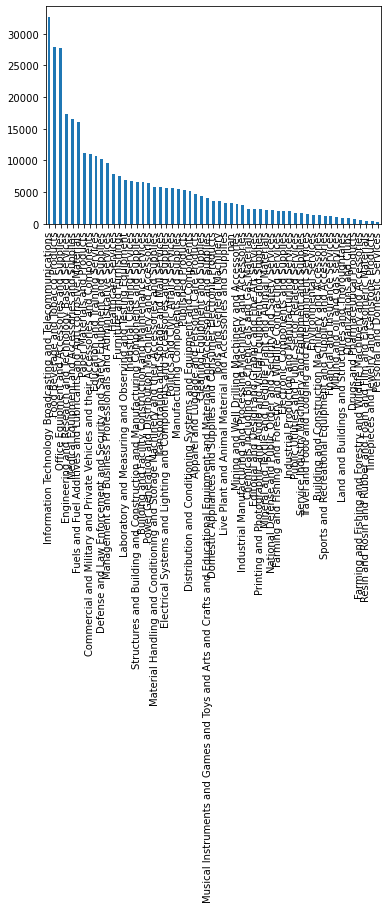

In [7]:
data['Segment Title'].value_counts().plot(kind='bar')

### Descriptive analysis of Grouped Data focusing on Sales

In [8]:
group_data = data.groupby(["Segment Title"]).sum().sort_values(["Total Price"])

In [9]:
group_data.describe()

,Quantity,Unit Price,Total Price
count,5.700000e+01,5.700000e+01,5.700000e+01
mean,1.175911e+07,2.621809e+09,2.646692e+09
std,4.881205e+07,1.475741e+10,1.475592e+10
min,1.366338e+04,1.030855e+05,1.809830e+05
25%,3.745900e+05,7.114412e+07,8.817124e+07
50%,1.551163e+06,1.599710e+08,1.829333e+08
75%,3.451597e+06,4.928345e+08,5.618046e+08
max,3.262962e+08,1.117452e+11,1.117537e+11


In [10]:
group_data

,Quantity,Unit Price,Total Price
Segment Title,,,
Timepieces and Jewelry and Gemstone Products,1.366338e+04,1.030855e+05,1.809830e+05
Resin and Rosin and Rubber and Foam and Film and Elastomeric Materials,1.703454e+05,4.541721e+06,8.322122e+06
Sports and Recreational Equipment and Supplies and Accessories,1.196845e+05,1.057879e+07,1.205000e+07
Service Industry Machinery and Equipment and Supplies,3.802543e+06,1.870926e+07,2.343973e+07
Electronic Components and Supplies,3.101387e+05,1.841385e+07,2.745349e+07
Farming and Fishing and Forestry and Wildlife Machinery and Accessories,1.551163e+06,1.995880e+07,2.761327e+07
Drugs and Pharmaceutical Products,4.116904e+05,2.507267e+07,3.103891e+07
Printing and Photographic and Audio and Visual Equipment and Supplies,1.120019e+05,2.638602e+07,3.109714e+07
Tools and General Machinery,3.319538e+05,3.332365e+07,3.664815e+07


In [11]:
print("Kurtosis (Total Price by group):"+str(group_data["Total Price"].kurtosis()))
print("Skew (Total Price by group):"+str(group_data["Total Price"].skew()))

Kurtosis (Total Price by group):56.249175602760076
Skew (Total Price by group):7.477633719668517


### Descriptive analysis using Scipy

In [12]:
from scipy import stats

In [13]:
stats.describe(group_data["Total Price"])

DescribeResult(nobs=57, minmax=(180983.05, 111753708471.22), mean=2646691640.8161407, variance=2.177370854736818e+20, skewness=7.279397517855887, kurtosis=51.33129665646472)

In [14]:
stats.gmean(group_data["Total Price"])

219758500.3817994

In [15]:
stats.hmean(group_data["Total Price"])

9189204.405215574

In [16]:
fischer = stats.norm.rvs(size=1000, random_state=3)
stats.kurtosis(fischer)

-0.06928694200380558

In [17]:
stats.mode(group_data["Total Price"])

ModeResult(mode=array([180983.05]), count=array([1]))

In [18]:
stats.moment(group_data["Total Price"],moment=4)

2.4862295463557663e+42

In [19]:
stats.skew(group_data["Total Price"])

7.279397517855887

In [20]:
stats.tmean(group_data["Total Price"])

2646691640.8161407

In [21]:
stats.tvar(group_data["Total Price"])

2.177370854736818e+20

In [22]:
stats.tmin(group_data["Total Price"])

180983.05

In [23]:
stats.tmax(group_data["Total Price"])

111753708471.22

In [24]:
stats.tstd(group_data["Total Price"])

14755916964.854532

In [25]:
stats.tsem(group_data["Total Price"])

1954468947.811484

In [26]:
stats.variation(group_data["Total Price"],ddof=1)

5.575230879674505

In [27]:
stats.find_repeats(group_data["Total Price"])

RepeatedResults(values=array([], dtype=float64), counts=array([], dtype=int64))

In [28]:
stats.gstd(group_data["Total Price"])

7.335432554390006

In [29]:
stats.iqr(group_data["Total Price"])

473633329.19

In [30]:
stats.sem(group_data["Total Price"])

1954468947.811484

In [31]:
mean, var, std = stats.bayes_mvs(group_data["Total Price"])
print(mean)
print(var)
print(std)

Mean(statistic=2646691640.8161407, minmax=(-622201264.3651266, 5915584545.997406))
Variance(statistic=2.2580142197270705e+20, minmax=(1.6373776265518236e+20, 3.0635390400257576e+20))
Std_dev(statistic=14957287054.3103, minmax=(12796005730.507563, 17502968434.027863))
